In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [23]:

def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    euclidean_distance = np.sqrt(np.sum((point - data) ** 2, axis=1))
    return euclidean_distance


def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)


class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])

        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy, y_pred


In [24]:
# Load Data

def load_iris_data():
    iris = datasets.load_iris()
    X = iris['data']
    y = iris['target']

    # Split data into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Preprocess data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

X_train, X_test, y_train, y_test = load_iris_data()

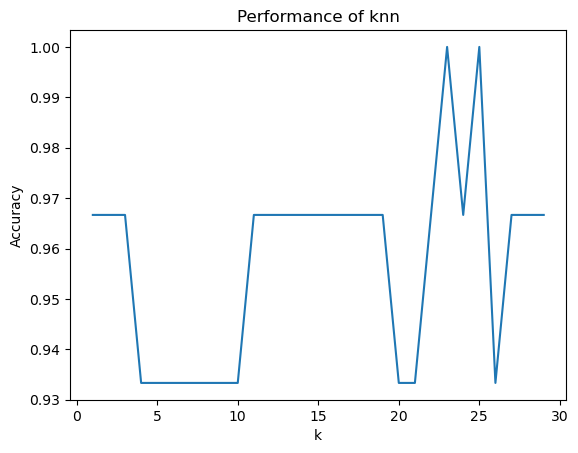

The Best k to choose : 22


In [25]:
# Choose the best k
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy, y_pred = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(list(ks), accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()
best_k=np.argmax(np.array(accuracies))
print(f"The Best k to choose : {best_k}")

In [26]:
knn = KNeighborsClassifier(k=best_k)
knn.fit(X_train, y_train)
train_accuracy, train_y_pred = knn.evaluate(X_train, y_train)
test_accuracy, test_y_pred = knn.evaluate(X_test, y_test)

# print results
print('K nearest neighbor Train Accuracy: ', train_accuracy)
print('K nearest neighbor Test Accuracy: ', test_accuracy)

K nearest neighbor Train Accuracy:  0.95
K nearest neighbor Test Accuracy:  0.9666666666666667
